In [ ]:
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import json

In [ ]:
pd.set_option('display.max_rows', 2358)

In [ ]:
url = 'https://understat.com/league' 
leagues = ['La_liga', 'EPL', 'Bundesliga', 'Serie_A', 'Ligue_1', 'RFPL'] 
seasons = ['2019']

In [ ]:
def data_scraping(league, season):
  url_to_scr = 'https://understat.com/league'+'/'+league+'/'+season
  res = requests.get(url_to_scr)
  soup = BeautifulSoup(res.content, "lxml")
  scripts = soup.find_all('script')
  string_with_json_obj = '' 

  for el in scripts: 
      if 'playersData' in el.text: 
          string_with_json_obj = el.text.strip()

  ind_start = string_with_json_obj.index("('")+2 
  ind_end = string_with_json_obj.index("')") 
  json_data_decode = string_with_json_obj[ind_start:ind_end] 
  json_data = json_data_decode.encode('utf8').decode('unicode_escape')
  data = json.loads(json_data)

  return pd.DataFrame(data)

In [ ]:
la_liga = data_scraping(leagues[0],seasons[0])
epl = data_scraping(leagues[1],seasons[0])
bundesliga = data_scraping(leagues[2],seasons[0])
serie_a = data_scraping(leagues[3],seasons[0])
ligue_1 = data_scraping(leagues[4],seasons[0])
rfpl = data_scraping(leagues[5],seasons[0])

In [ ]:
num_features = ['games','time','goals','xG','assists','xA','shots','key_passes','yellow_cards','red_cards','npg', 'npxG','xGChain','xGBuildup']
cat_features = ['player_name','position','team_title']

In [ ]:
full_leagues = pd.concat([la_liga,epl,bundesliga,serie_a,ligue_1,rfpl])

In [ ]:
num_leagues = full_leagues[num_features].apply(pd.to_numeric)

In [ ]:
final_df = pd.concat([full_leagues[cat_features], num_leagues], axis = 1)

In [ ]:
final_df.head()

,player_name,position,team_title,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
0,Lionel Messi,F M S,Barcelona,33,2876,25,20.849667,20,16.593363,159,88,4,0,20,17.133279,34.923467,13.537658
1,Karim Benzema,F S,Real Madrid,37,3176,21,21.250922,8,8.153260,124,59,0,0,16,17.534662,31.533140,10.845874
2,Gerard Moreno,F M S,Villarreal,35,2781,18,15.308760,5,7.582541,89,50,5,0,17,13.822204,23.274221,6.311414
3,Luis Suárez,F S,Barcelona,28,1989,16,13.913964,8,3.169745,79,26,4,0,15,13.170687,18.988987,4.466442
4,Raúl García,F M S,Athletic Club,35,2899,15,11.145032,1,1.682315,81,22,11,0,8,5.942345,6.844850,1.742752


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 478
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_name   3140 non-null   object 
 1   position      3140 non-null   object 
 2   team_title    3140 non-null   object 
 3   games         3140 non-null   int64  
 4   time          3140 non-null   int64  
 5   goals         3140 non-null   int64  
 6   xG            3140 non-null   float64
 7   assists       3140 non-null   int64  
 8   xA            3140 non-null   float64
 9   shots         3140 non-null   int64  
 10  key_passes    3140 non-null   int64  
 11  yellow_cards  3140 non-null   int64  
 12  red_cards     3140 non-null   int64  
 13  npg           3140 non-null   int64  
 14  npxG          3140 non-null   float64
 15  xGChain       3140 non-null   float64
 16  xGBuildup     3140 non-null   float64
dtypes: float64(5), int64(9), object(3)
memory usage: 441.6+ KB


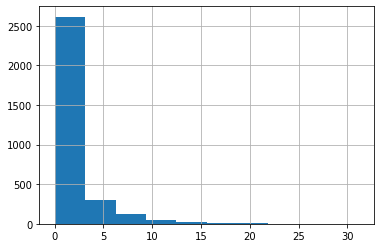

In [ ]:
final_df['xG'].hist()

In [ ]:
from sklearn.preprocessing import Normalizer
norma = Normalizer()
X_train = norma.fit_transform(num_leagues)
num_final_train = pd.DataFrame(X_train , columns = num_features)

In [ ]:
num_final_train.head()

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
0,0.011448,0.997713,0.008673,0.007233,0.006938,0.005756,0.055159,0.030528,0.001388,0.0,0.006938,0.005944,0.012115,0.004696
1,0.011637,0.998866,0.006605,0.006684,0.002516,0.002564,0.038999,0.018556,0.000000,0.0,0.005032,0.005515,0.009917,0.003411
2,0.012575,0.999137,0.006467,0.005500,0.001796,0.002724,0.031975,0.017964,0.001796,0.0,0.006108,0.004966,0.008362,0.002268
3,0.014061,0.998862,0.008035,0.006987,0.004018,0.001592,0.039673,0.013057,0.002009,0.0,0.007533,0.006614,0.009536,0.002243
4,0.012067,0.999471,0.005171,0.003842,0.000345,0.000580,0.027926,0.007585,0.003792,0.0,0.002758,0.002049,0.002360,0.000601


In [ ]:
num_final_train.drop(['xA','npxG','xGChain','xGBuildup'],axis = 1, inplace=True)

In [ ]:
num_final_train.head()

,games,time,goals,xG,assists,shots,key_passes,yellow_cards,red_cards,npg
0,0.011448,0.997713,0.008673,0.007233,0.006938,0.055159,0.030528,0.001388,0.0,0.006938
1,0.011637,0.998866,0.006605,0.006684,0.002516,0.038999,0.018556,0.000000,0.0,0.005032
2,0.012575,0.999137,0.006467,0.005500,0.001796,0.031975,0.017964,0.001796,0.0,0.006108
3,0.014061,0.998862,0.008035,0.006987,0.004018,0.039673,0.013057,0.002009,0.0,0.007533
4,0.012067,0.999471,0.005171,0.003842,0.000345,0.027926,0.007585,0.003792,0.0,0.002758


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_1hot_train = cat_encoder.fit_transform(final_df[['position']])
cat_col_names_train = cat_encoder.get_feature_names(['position'])

In [ ]:
cat_1hot_array = cat_1hot_train.toarray()
cat_final = pd.DataFrame(cat_1hot_array, columns = cat_col_names_train)

In [ ]:
X_real = pd.concat([num_final_train, cat_final], axis = 1)

In [ ]:
X_real.head()

,games,time,goals,xG,assists,shots,key_passes,yellow_cards,red_cards,npg,position_D,position_D F,position_D F M,position_D F M S,position_D F S,position_D M,position_D M S,position_D S,position_F,position_F M,position_F M S,position_F S,position_GK,position_GK S,position_M,position_M S,position_S
0,0.011448,0.997713,0.008673,0.007233,0.006938,0.055159,0.030528,0.001388,0.0,0.006938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.011637,0.998866,0.006605,0.006684,0.002516,0.038999,0.018556,0.000000,0.0,0.005032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.012575,0.999137,0.006467,0.005500,0.001796,0.031975,0.017964,0.001796,0.0,0.006108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.014061,0.998862,0.008035,0.006987,0.004018,0.039673,0.013057,0.002009,0.0,0.007533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.012067,0.999471,0.005171,0.003842,0.000345,0.027926,0.007585,0.003792,0.0,0.002758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df= X_real
X = df.drop(['xG'], axis=1)
y = df[['xG']]

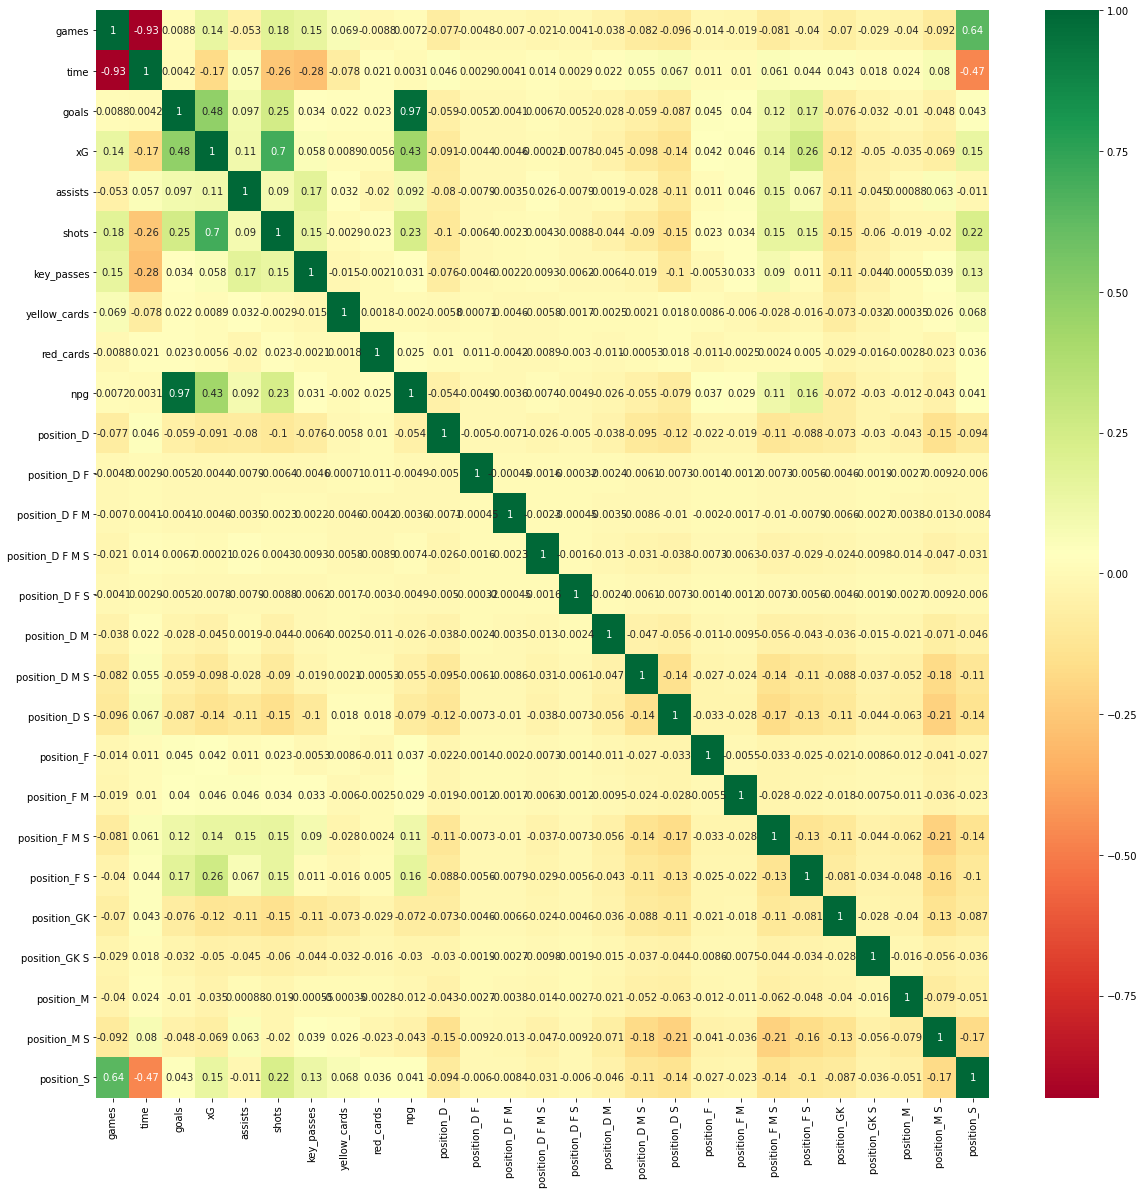

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:
corrmat = X.corr()
corrmat['goals'].sort_values(ascending = False)


goals               1.000000
npg                 0.974084
shots               0.251089
position_F S        0.174413
position_F M S      0.119293
assists             0.096566
position_F          0.045360
position_S          0.042603
position_F M        0.040020
key_passes          0.033854
red_cards           0.023462
yellow_cards        0.022480
games               0.008753
position_D F M S    0.006684
time                0.004163
position_D F M     -0.004123
position_D F       -0.005234
position_D F S     -0.005234
position_M         -0.010419
position_D M       -0.027704
position_GK S      -0.031580
position_M S       -0.047619
position_D         -0.059095
position_D M S     -0.059497
position_GK        -0.076278
position_D S       -0.087317
Name: goals, dtype: float64

In [ ]:
X = X[['npg','shots','position_F S', 'position_F M S']]
X.head()

,npg,shots,position_F S,position_F M S
0,0.006938,0.055159,0.0,1.0
1,0.005032,0.038999,1.0,0.0
2,0.006108,0.031975,0.0,1.0
3,0.007533,0.039673,1.0,0.0
4,0.002758,0.027926,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.7073996205382678


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

3.874344619607937e-06

In [ ]:
3.874344619607937e-06


3.874344619607937e-06